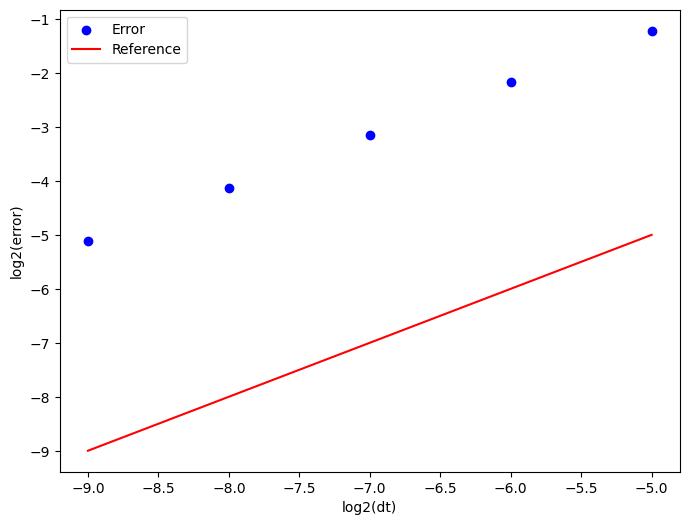

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set the seed for reproducibility
# np.random.seed(1234)

mu = 2
sigma = 0.1

Xzero = 1

T = 1
N = 2**9
dt = T/N

reps = 10**5
decreasing_number = 5

dW = np.sqrt(dt) * np.random.randn(reps, N)
W = np.cumsum(dW, axis=1)

Xpath = np.zeros((reps, N+1))
Xpath[:, 0] = Xzero

Xem = {}

for i in range(1, decreasing_number + 1):
    Xem[i - 1] = np.zeros((reps, (N//(2**(i-1)))+1))

for i in range(N):
    Xpath[:, i + 1] = Xpath[:, i] * np.exp((mu - 0.5*sigma**2)*dt + sigma*dW[:, i])

for i in range(1, decreasing_number + 1):
    Xem[i - 1][:, 0] = Xzero

    dWTemp = np.zeros((reps, N//2**(i-1)))

    for j in range(2**(i-1)):
        dWTemp += dW[:, j::2**(i-1)]

    for j in range(N//2**(i-1)):
        Xem[i - 1][:, j + 1] = Xem[i - 1][:, j] + mu*Xem[i - 1][:, j]*dt*2**(i-1) + sigma*Xem[i - 1][:, j]*dWTemp[:, j]

expectedPathEnd = np.mean(Xpath[:, -1])
error = np.zeros(decreasing_number)

for i in range(1, decreasing_number + 1):
    error[i-1] = abs(np.mean(Xem[i - 1][:, -1]) - expectedPathEnd)

log2_error = np.log2(error)

plt.figure(figsize=(8, 6))
plt.scatter(np.arange(-9, -9 + decreasing_number), log2_error, color='blue', label='Error')
plt.plot(np.arange(-9, -9 + decreasing_number), np.arange(-9, -9 + decreasing_number), color='red', label='Reference')
plt.xlabel('log2(dt)')
plt.ylabel('log2(error)')
plt.legend()
plt.show()

In [4]:
log2_error

array([-5.12216237, -4.12863162, -3.14147915, -2.16727841, -1.21713823])

In [7]:
np.linalg.lstsq(np.vstack([np.arange(-9, -9 + decreasing_number), np.ones(decreasing_number)]).T, [-5.119692827980430,-4.126580805941359,-3.139280181144418,-2.164858381700999,-1.214870461191348], rcond=None)[0]

array([0.97713672, 3.68690048])